In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from jupyterthemes import jtplot
import os
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline
jtplot.style(grid=False)

Using TensorFlow backend.


In [2]:
from keras.applications.resnet50 import ResNet50

In [3]:
model = ResNet50(weights=None,input_shape=(64,64,3), classes=29)

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}
dirlist = os.listdir('dataset/train')
def load_dataset():
    images = []
    labels = []
    path = 'dataset/train/'
    print('Extracting images from: ', end=" ")
    for folder in dirlist:
        print(folder, end="| ")
        for img in os.listdir(path+folder):
            t = cv2.imread(path+folder+'/'+img)
            t = cv2.resize(t, (64,64))
            images.append(t)
            labels.append(labels_dict[folder])
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = keras.utils.to_categorical(labels)
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    return X_train, X_test, Y_train, Y_test

In [6]:
X_train, X_test, Y_train, Y_test = load_dataset()

Extracting images from:  A| B| C| D| del| E| F| G| H| I| J| K| L| M| N| nothing| O| P| Q| R| S| space| T| U| V| W| X| Y| Z| 

In [13]:
from keras.callbacks.callbacks import ModelCheckpoint
check = ModelCheckpoint('asl64Model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [14]:
model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 20, validation_split = 0.1, callbacks=[check])

Train on 74385 samples, validate on 8265 samples
Epoch 1/20
74385/74385 [==============================] - 207s 3ms/step - loss: 0.0639 - accuracy: 0.9830 - val_loss: 2.8087 - val_accuracy: 0.6136

Epoch 00001: val_accuracy improved from -inf to 0.61355, saving model to asl64Model.h5
Epoch 2/20
74385/74385 [==============================] - 209s 3ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.1153 - val_accuracy: 0.9661

Epoch 00002: val_accuracy improved from 0.61355 to 0.96612, saving model to asl64Model.h5
Epoch 3/20
74385/74385 [==============================] - 209s 3ms/step - loss: 0.0203 - accuracy: 0.9941 - val_loss: 0.0077 - val_accuracy: 0.9973

Epoch 00003: val_accuracy improved from 0.96612 to 0.99734, saving model to asl64Model.h5
Epoch 4/20
74385/74385 [==============================] - 211s 3ms/step - loss: 0.0456 - accuracy: 0.9889 - val_loss: 0.0046 - val_accuracy: 0.99830 - ac - ETA: 0s - loss: 0.0457 - accuracy

Epoch 00004: val_accuracy improved from 0.9973

In [15]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

4350/4350 [==============================] - 4s 895us/step

Evaluation Accuracy =  99.98% 
Evaluation loss =  0.000974


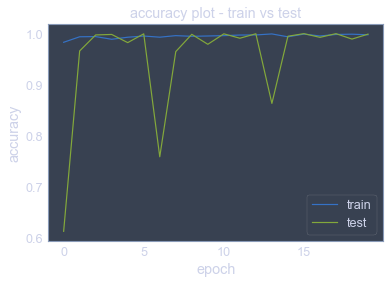

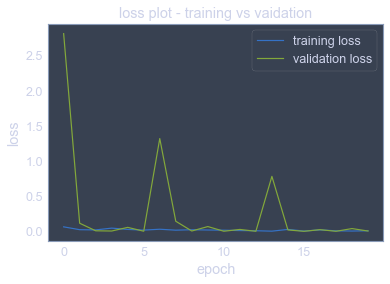

In [18]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [31]:
Label = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y',
                   'Z','space','del','nothing']
t = cv2.imread('IMG_20200504_231950.jpg')
t = cv2.resize(t, (64,64))
t = t/255
t = t[np.newaxis, :]
Label[np.argmax(model.predict(t))]


'C'

In [27]:
model.save('aslFinal.h5')